In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
%pip install mlxtend

In [4]:
df = pd.read_csv('/Users/nikgurunathan/Desktop/Heart_cleaned.csv')

In [5]:
# Select only illness columns (replace with your actual column names)
illness_columns = ['HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 
                   'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 
                   'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 
                   'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 
                   'DifficultyConcentrating', 'DifficultyWalking', 
                   'DifficultyDressingBathing', 'DifficultyErrands']


In [6]:
# Convert to binary format if not already (1 = "Yes", 0 = "No")
df = df[illness_columns].applymap(lambda x: 1 if str(x).lower() == 'yes' else 0)

/var/folders/qn/4dpq089x26d0h5p0v709glyw0000gn/T/ipykernel_38725/1766349850.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df[illness_columns].applymap(lambda x: 1 if str(x).lower() == 'yes' else 0)


/Users/nikgurunathan/Desktop/My-DAC-Curriculum/.venv/lib/python3.13/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/nikgurunathan/Desktop/My-DAC-Curriculum/.venv/lib/python3.13/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


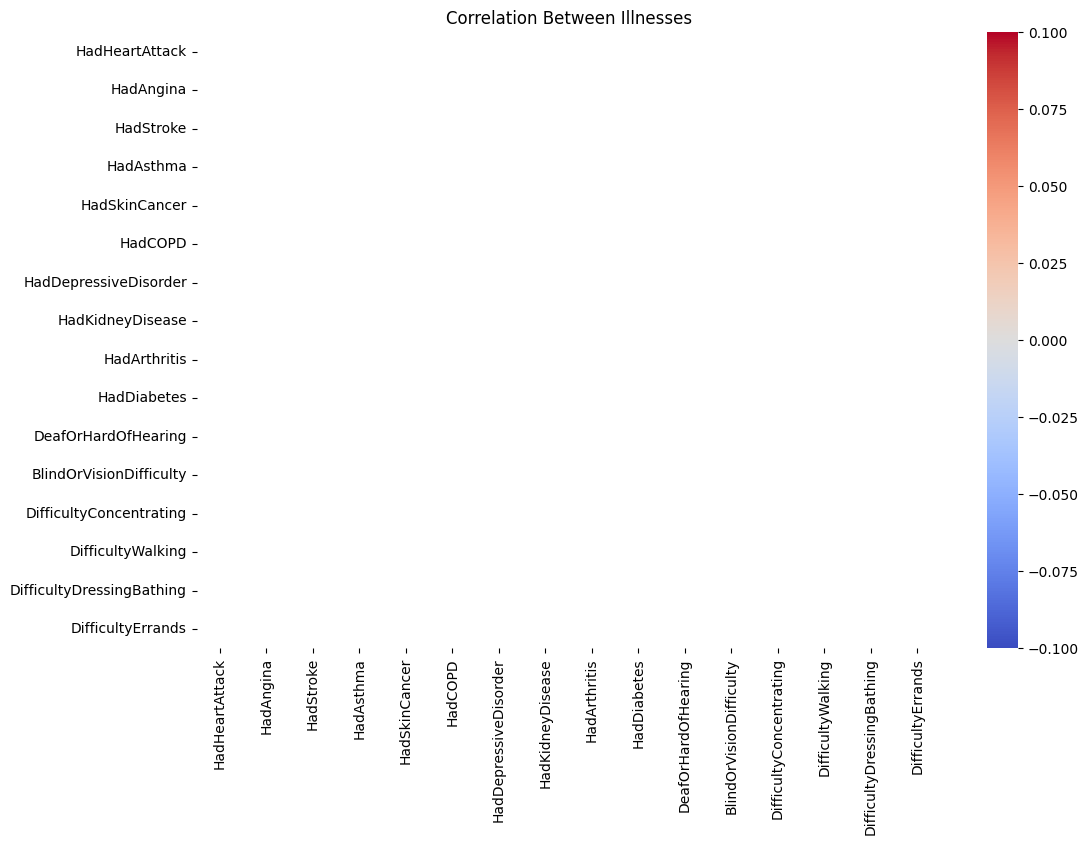

In [7]:
# Step 2: Correlation Analysis (Visualize relationships between illnesses)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Illnesses")
plt.show()

In [8]:
# Step 3: Build Predictive Models for Each Illness
# Predict one illness based on all other illnesses
target_illness = 'HadHeartAttack'  # Replace with the illness you want to predict


In [9]:
# Features (X) and target (y)
X = df.drop(columns=[target_illness])
y = df[target_illness]

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Predict on test data
y_pred = model.predict(X_test)


In [13]:
# Evaluate Model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     88953

    accuracy                           1.00     88953
   macro avg       1.00      1.00      1.00     88953
weighted avg       1.00      1.00      1.00     88953


Confusion Matrix:
 [[88953]]


/Users/nikgurunathan/Desktop/My-DAC-Curriculum/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


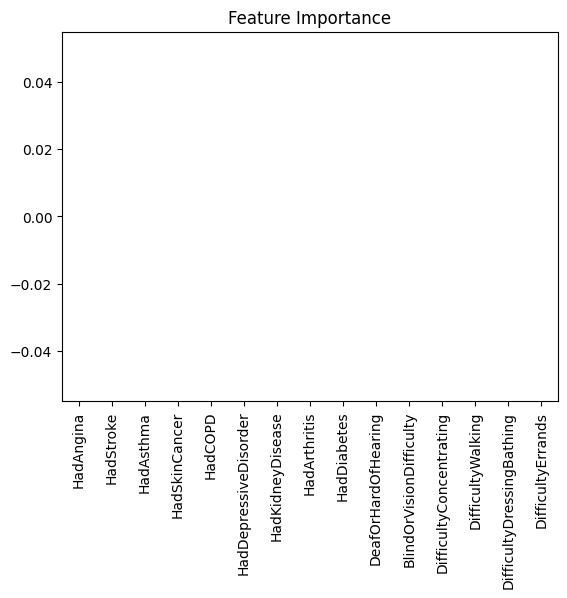

In [14]:
# Feature Importance
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', title="Feature Importance")
plt.show()

In [18]:
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming 'df' is your one-hot encoded DataFrame
# Step 1: Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# Step 2: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Step 3: Display the rules
print(rules)


/Users/nikgurunathan/Desktop/My-DAC-Curriculum/.venv/lib/python3.13/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [17]:

print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Association Rules:


NameError: name 'rules' is not defined